This program is to look for fraud in presidentail elections 1976 to 2020

Import libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load and read dataset

File was taken from the following sites and apended:-
present taken from:- https://www.kaggle.com/unanimad/us-election-2020?select=president_county_candidate.csv
past taken from:- https://electionlab.mit.edu/data

1:democrat, 2:republican, 3:other

In [119]:
train=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/US-presidential-elections-2020/main/series.csv")
train

,state,candidate,party,year,candidatevotes
0,Alabama,"Carter, Jimmy",1.0,1976,659170
1,Alabama,"Ford, Gerald",2.0,1976,504070
2,Alabama,"Maddox, Lester",3.0,1976,9198
3,Alabama,"Bubar, Benjamin """"Ben""""",3.0,1976,6669
4,Alabama,"Hall, Gus",3.0,1976,1954
...,...,...,...,...,...
4086,Wyoming,Write-ins,3.0,2020,1739
4087,Wyoming,Brock Pierce,3.0,2020,2208
4088,Wyoming,Donald Trump,2.0,2020,193559
4089,Wyoming,Jo Jorgensen,3.0,2020,5768


Check for null values

In [120]:
train.isnull().sum()

state             0
candidate         0
party             0
year              0
candidatevotes    0
dtype: int64

Graphical representation of votes

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



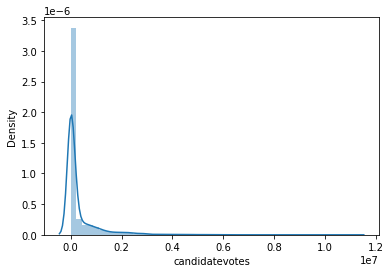

In [121]:
sns.distplot(train.candidatevotes)

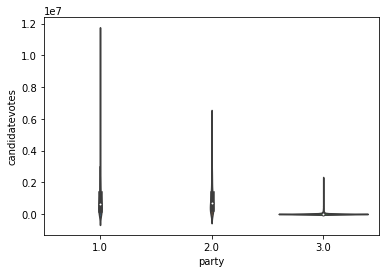

In [122]:
ax = sns.violinplot(x="party", y="candidatevotes", data=train)

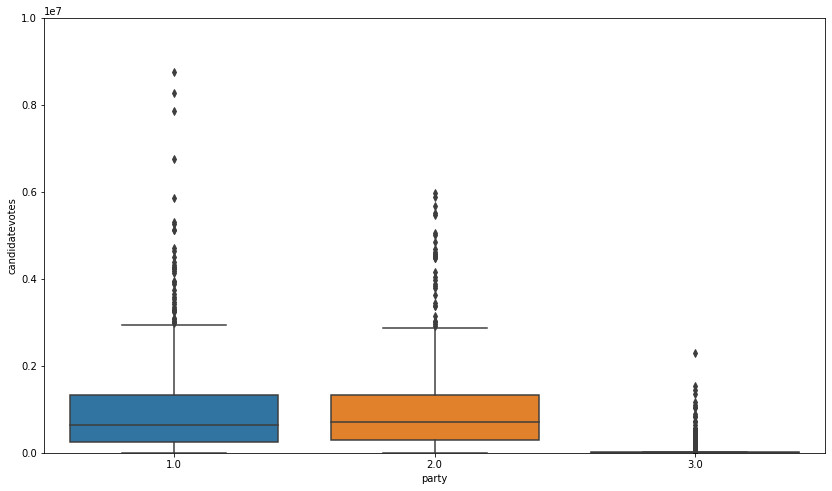

In [123]:
var = 'party'
data = pd.concat([train['candidatevotes'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="candidatevotes", data=data)
fig.axis(ymin=0, ymax=10000000);

Define model

In [124]:
from sklearn.ensemble import IsolationForest

model=IsolationForest(n_estimators=1000, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(train[['candidatevotes']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=1000,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [125]:
train['scores']=model.decision_function(train[['candidatevotes']])
train['anomaly']=model.predict(train[['candidatevotes']])
train

,state,candidate,party,year,candidatevotes,scores,anomaly
0,Alabama,"Carter, Jimmy",1.0,1976,659170,0.019009,1
1,Alabama,"Ford, Gerald",2.0,1976,504070,0.015622,1
2,Alabama,"Maddox, Lester",3.0,1976,9198,0.163485,1
3,Alabama,"Bubar, Benjamin """"Ben""""",3.0,1976,6669,0.175084,1
4,Alabama,"Hall, Gus",3.0,1976,1954,0.198490,1
...,...,...,...,...,...,...,...
4086,Wyoming,Write-ins,3.0,2020,1739,0.199331,1
4087,Wyoming,Brock Pierce,3.0,2020,2208,0.198633,1
4088,Wyoming,Donald Trump,2.0,2020,193559,0.054191,1
4089,Wyoming,Jo Jorgensen,3.0,2020,5768,0.180951,1


In [126]:
anomaly=train.loc[train['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

           state      candidate  party  year  candidatevotes    scores  anomaly
23    California   Ford, Gerald    2.0  1976         3882244 -0.204548       -1
24    California  Carter, Jimmy    1.0  1976         3742284 -0.198070       -1
55       Florida  Carter, Jimmy    1.0  1976         1636000 -0.052950       -1
56       Florida   Ford, Gerald    2.0  1976         1469531 -0.042251       -1
70      Illinois   Ford, Gerald    2.0  1976         2364269 -0.086990       -1
...          ...            ...    ...   ...             ...       ...      ...
4067    Virginia      Joe Biden    1.0  2020         2413568 -0.090870       -1
4070  Washington   Donald Trump    2.0  2020         1584588 -0.052655       -1
4074  Washington      Joe Biden    1.0  2020         2369437 -0.087335       -1
4083   Wisconsin   Donald Trump    2.0  2020         1610151 -0.053475       -1
4085   Wisconsin      Joe Biden    1.0  2020         1630716 -0.053967       -1

[409 rows x 7 columns]


In [127]:
outliers_counter = len(train[train['candidatevotes'] > 999999])
outliers_counter

442

In [128]:
outliers_year = anomaly.groupby(['state','candidate','year', 'party'])['candidatevotes'].sum().reset_index()
outliers_year

,state,candidate,year,party,candidatevotes
0,Alabama,"Bush, George W.",2004,2.0,1176394
1,Alabama,Donald Trump,2020,2.0,1441170
2,Alabama,"McCain, John",2008,2.0,1266546
3,Alabama,"Romney, Mitt",2012,2.0,1255925
4,Alabama,"Trump, Donald J.",2016,2.0,1318255
...,...,...,...,...,...
404,Wisconsin,"Obama, Barack H.",2008,1.0,1677211
405,Wisconsin,"Obama, Barack H.",2012,1.0,1620985
406,Wisconsin,"Reagan, Ronald",1984,2.0,1198584
407,Wisconsin,"Romney, Mitt",2012,2.0,1410966


In [129]:
print(outliers_year.loc[outliers_year['year'] == 2008])

              state         candidate  year  party  candidatevotes
2           Alabama      McCain, John  2008    2.0         1266546
9           Arizona      McCain, John  2008    2.0         1230111
28       California      McCain, John  2008    2.0         5011781
30       California  Obama, Barack H.  2008    1.0         8274473
41         Colorado  Obama, Barack H.  2008    1.0         1288576
62          Florida      McCain, John  2008    2.0         4045624
64          Florida  Obama, Barack H.  2008    1.0         4282074
78          Georgia      McCain, John  2008    2.0         2048759
79          Georgia  Obama, Barack H.  2008    1.0         1844123
99         Illinois      McCain, John  2008    2.0         2031179
101        Illinois  Obama, Barack H.  2008    1.0         3419348
114         Indiana      McCain, John  2008    2.0         1345648
115         Indiana  Obama, Barack H.  2008    1.0         1374039
127       Louisiana      McCain, John  2008    2.0         114

In [130]:
print(outliers_year.loc[outliers_year['year'] == 2012])

              state         candidate  year  party  candidatevotes
3           Alabama      Romney, Mitt  2012    2.0         1255925
10          Arizona      Romney, Mitt  2012    2.0         1233654
31       California  Obama, Barack H.  2012    1.0         7854285
35       California      Romney, Mitt  2012    2.0         4839958
42         Colorado  Obama, Barack H.  2012    1.0         1323101
43         Colorado      Romney, Mitt  2012    2.0         1185243
65          Florida  Obama, Barack H.  2012    1.0         4237756
68          Florida      Romney, Mitt  2012    2.0         4163447
80          Georgia  Obama, Barack H.  2012    1.0         1773827
81          Georgia      Romney, Mitt  2012    2.0         2078688
102        Illinois  Obama, Barack H.  2012    1.0         3019512
105        Illinois      Romney, Mitt  2012    2.0         2135216
116         Indiana  Obama, Barack H.  2012    1.0         1152887
119         Indiana      Romney, Mitt  2012    2.0         142

In [131]:
print(outliers_year.loc[outliers_year['year'] == 2016])

              state         candidate  year  party  candidatevotes
4           Alabama  Trump, Donald J.  2016    2.0         1318255
6           Arizona  Clinton, Hillary  2016    1.0         1161167
11          Arizona  Trump, Donald J.  2016    2.0         1252401
20       California  Clinton, Hillary  2016    1.0         8753788
36       California  Trump, Donald J.  2016    2.0         4483810
38         Colorado  Clinton, Hillary  2016    1.0         1338870
44         Colorado  Trump, Donald J.  2016    2.0         1202484
54          Florida  Clinton, Hillary  2016    1.0         4504975
69          Florida  Trump, Donald J.  2016    2.0         4617886
72          Georgia  Clinton, Hillary  2016    1.0         1877963
82          Georgia  Trump, Donald J.  2016    2.0         2089104
91         Illinois  Clinton, Hillary  2016    1.0         3090729
106        Illinois  Trump, Donald J.  2016    2.0         2146015
120         Indiana  Trump, Donald J.  2016    2.0         155

In [132]:
print(outliers_year.loc[outliers_year['year'] == 2020])

              state     candidate  year  party  candidatevotes
1           Alabama  Donald Trump  2020    2.0         1441170
7           Arizona  Donald Trump  2020    2.0         1661686
8           Arizona     Joe Biden  2020    1.0         1672143
22       California  Donald Trump  2020    2.0         5982194
26       California     Joe Biden  2020    1.0        11082293
39         Colorado  Donald Trump  2020    2.0         1364471
40         Colorado     Joe Biden  2020    1.0         1804196
45      Connecticut     Joe Biden  2020    1.0         1080680
56          Florida  Donald Trump  2020    2.0         5668731
60          Florida     Joe Biden  2020    1.0         5297045
74          Georgia  Donald Trump  2020    2.0         2461837
76          Georgia     Joe Biden  2020    1.0         2474507
93         Illinois  Donald Trump  2020    2.0         2814790
97         Illinois     Joe Biden  2020    1.0         4241849
110         Indiana  Donald Trump  2020    2.0         

In [133]:
print("Accuracy percentage:", 100*list(train['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 92.53393665158372
